In [1]:
import pandas as pd
import scipy.stats as sp
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("AWS_sample.txt", sep = "#")
df = df.loc[df["AWS_ID"] == 108, ]
df.head(2)

,AWS_ID,TM,TA,Wind,X.
0,108,2016-07-01 00,24.2,2.3,=
1,108,2016-07-01 01,24.3,2.3,=


((array([-3.49673324, -3.25267312, -3.11769007, ...,  3.11769007,
          3.25267312,  3.49673324]),
  array([ 1.7,  1.9,  2.2, ..., 36.1, 36.2, 36.4])),
 (5.970046716953083, 23.413829425756028, 0.9896240027556145))

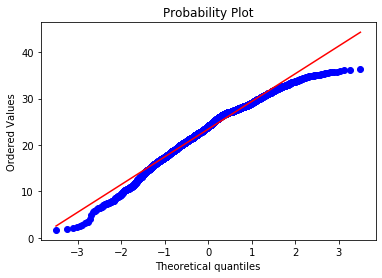

In [4]:
sp.probplot(df["TA"], plot = plt)

((array([-3.49673324, -3.25267312, -3.11769007, ...,  3.11769007,
          3.25267312,  3.49673324]),
  array([ 1.7,  1.9,  2.2, ..., 36.1, 36.2, 36.4])),
 (5.970046716953083, 23.413829425756028, 0.9896240027556145))

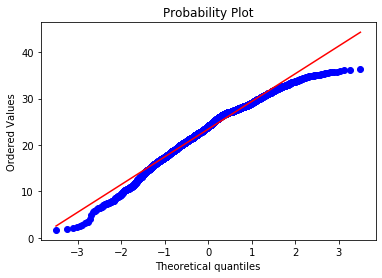

In [5]:
import pandas as pd
from scipy.stats import probplot
from matplotlib import pyplot as plt

df = pd.read_csv("AWS_sample.txt", sep = "#")
df = df.loc[df["AWS_ID"] == 108, ]

probplot(df["TA"], plot = plt)

In [6]:
df = pd.read_csv("bike.csv")
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [8]:
# df.kurtosis() # column 기반 연산.
df.kurt()

season        -1.355661
holiday       30.046975
workingday    -1.397828
weather        0.395533
temp          -0.914530
atemp         -0.850076
humidity      -0.759818
windspeed      0.630133
casual         7.551629
registered     2.626081
count          1.300093
dtype: float64

In [9]:
df["temp"].kurt()
df["temp"].skew()

0.003690844422472008

In [11]:
df2 = df.set_index("season")
df2.head(1)

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,,,,,,,,,,,
1,2011-01-01 00:00:00,0,0,1,9.84,14.395,81,0.0,3,13,16


In [12]:
df2.kurt(level = "season")

,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,,,,,,,,,,
1,32.921622,-1.400471,0.384670,0.114545,-0.106134,-0.433792,0.335609,34.286416,4.709668,4.314757
2,52.052753,-1.302876,0.347588,-0.232492,-0.060169,-1.007305,0.237428,5.527495,1.707194,0.425213
3,23.550413,-1.441438,0.972714,0.175452,2.439905,-0.746044,1.756376,3.142335,2.093644,0.699383
4,23.560818,-1.440570,0.028475,-0.493403,-0.580080,-0.961572,-0.072296,12.343876,2.310093,1.273485


In [13]:
df3 = df.set_index(["season", "holiday"])
df3.head(2)

datetime  workingday  weather  temp   atemp  \
season holiday                                                           
1      0        2011-01-01 00:00:00           0        1  9.84  14.395   
       0        2011-01-01 01:00:00           0        1  9.02  13.635   

                humidity  windspeed  casual  registered  count  
season holiday                                                  
1      0              81        0.0       3          13     16  
       0              80        0.0       8          32     40

In [14]:
df3.kurt(level = ["season", "holiday"]) # season별 holiday별 각 변수의 첨도

workingday   weather      temp     atemp  humidity  windspeed  \
season holiday                                                                  
1      0         -1.246819  0.404278  0.085533 -0.126089 -0.456243   0.358447   
       1          0.000000 -0.120643 -0.039062  2.465892  3.542508  -0.461219   
2      0         -1.191449  0.304371 -0.215417 -0.043023 -1.013751   0.277178   
       1          0.000000  2.392365 -0.964497 -1.217644 -0.868578  -0.251322   
3      0         -1.241264  1.048749  0.144282  2.423765 -0.741032   1.762250   
       1          0.000000 -0.527732  0.353689  0.070978 -0.765898   2.103889   
4      0         -1.240232 -0.003151 -0.523005 -0.585588 -0.958516  -0.110445   
       1          0.000000  1.415165 -0.159531 -0.606510 -1.086226   0.571969   

                   casual  registered     count  
season holiday                                   
1      0        33.454243    4.589186  4.194842  
       1         1.606877   -0.793776 -0.780784  
2      0         5.450542    1.706700  0.412724  
       1        -0.471653    2.021007  1.515016  
3      0         3.655936    2.042064  0.762224  
       1        -1.360938   -1.162891 -1.483442  
4      0        13.049529    2.342205  1.338254  
       1         0.128554   -0.420820 -1.085700

In [15]:
iris = pd.read_csv("iris_xlsx.csv")
iris.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [24]:
iris_sub = iris.drop("Species", axis = 1) # Species 변수만 제거
iris_sub.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [20]:
# iris_sub.sum() # column 별 sum
iris_sub.sum(axis = 0)

Sepal.Length    876.5
Sepal.Width     458.6
Petal.Length    563.7
Petal.Width     179.9
dtype: float64

In [ ]:
iris_sub.sum(axis = 1) # row 별 sum

In [22]:
iris_sub.mean()

Sepal.Length    5.843333
Sepal.Width     3.057333
Petal.Length    3.758000
Petal.Width     1.199333
dtype: float64

In [25]:
iris_sub.mean(axis = 1)

0      2.550
1      2.375
2      2.350
3      2.350
4      2.550
       ...  
145    4.300
146    3.925
147    4.175
148    4.325
149    3.950
Length: 150, dtype: float64

In [26]:
df = pd.read_csv("iris_missing.csv")
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,NaN,NaN,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  143 non-null    float64
 1   Sepal.Width   137 non-null    float64
 2   Petal.Length  136 non-null    float64
 3   Petal.Width   144 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [31]:
df_sub = df.head()

In [39]:
# df_sub.loc[:, "test"] = df_sub["Sepal.Width"].fillna(df_sub["Sepal.Width"].mean())
df_sub.loc[:, "test"] = df_sub["Sepal.Width"].fillna(df_sub["Sepal.Width"].mean())
df_sub

C:\Users\Encaion\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,test
0,5.1,NaN,NaN,0.2,setosa,3.225
1,4.9,3.0,1.4,0.2,setosa,3.000
2,4.7,3.2,1.3,0.2,setosa,3.200
3,4.6,3.1,1.5,0.2,setosa,3.100
4,5.0,3.6,1.4,0.2,setosa,3.600


### 괄호의 용법
* 소괄호(): 수치연산의 우선순위, 함수의 인자를 묶을 때, 튜플 생성
* 중괄호{}: 딕셔너리 생성
* 대괄호\[\]: 인덱싱, 리스트 생성

In [40]:
df = pd.read_csv("iris_missing.csv")
df_mis = df.iloc[5:9, 0:-1]
df_mis

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5,5.4,3.9,1.7,0.4
6,NaN,NaN,NaN,NaN
7,5.0,3.4,NaN,0.2
8,4.4,2.9,1.4,0.2


In [ ]:
df_mis_2 = df.loc[5:9, ]
df_mis_2.columns = [0, 1, 2, 3, 4]
df_mis_2

In [44]:
df_mis_2.loc[5:7, 1:3]

,1,2,3
5,3.9,1.7,0.4
6,NaN,NaN,NaN
7,3.4,NaN,0.2


In [46]:
import numpy as np
ser = pd.Series([1, 2, np.nan, 6, 8])
ser

0    1.0
1    2.0
2    NaN
3    6.0
4    8.0
dtype: float64

In [48]:
ser.isna()
ser[ser.isna()]

2   NaN
dtype: float64